# Data Exploration with AWS Data Wrangler

from here: https://www.kaggle.com/hanriver0618/nyc-taxi-data-exploration-visualization/#data

In [ ]:
! pip install awswrangler

In [42]:
import awswrangler as wr
import boto3

In [43]:
def list_bucket_contents(bucket_resource, match='', size_mb=0):
    total_size_gb = 0
    total_files = 0
    match_size_gb = 0
    match_files = 0
    objects = []
    for key in bucket_resource.objects.all():
        key_size_mb = key.size/1024/1024
        total_size_gb += key_size_mb
        total_files += 1
        list_check = False
        if not match:
            list_check = True
        elif match in key.key:
            list_check = True

        if list_check and not size_mb:
            match_files += 1
            match_size_gb += key_size_mb
            
            print(f'{key.key} ({key_size_mb:3.0f}MB)')
            objects.append(key)            
            
        elif list_check and key_size_mb >= size_mb:
            match_files += 1
            match_size_gb += key_size_mb
            objects.append(key)
            print(f'{key.key} ({key_size_mb:3.0f}MB)')

    if match:
        print(f'Matched file size is {match_size_gb/1024:3.1f}GB with {match_files} files')            
    
    print(f'Bucket {bucket_resource.name} total size is {total_size_gb/1024:3.1f}GB with {total_files} files')
    return objects

In [44]:
s3 = boto3.client('s3')
s3_resource = boto3.resource('s3')
taxi_bucket = s3_resource.Bucket("nyc-tlc")

# select all files with matching having "trip data" in S3 key and bigger than 1MB
objects = list_bucket_contents(taxi_bucket, match="green", size_mb=100)


trip data/green_tripdata_2014-01.csv (119MB)
trip data/green_tripdata_2014-02.csv (149MB)
trip data/green_tripdata_2014-03.csv (193MB)
trip data/green_tripdata_2014-04.csv (195MB)
trip data/green_tripdata_2014-05.csv (212MB)
trip data/green_tripdata_2014-06.csv (200MB)
trip data/green_tripdata_2014-07.csv (190MB)
trip data/green_tripdata_2014-08.csv (201MB)
trip data/green_tripdata_2014-09.csv (204MB)
trip data/green_tripdata_2014-10.csv (223MB)
trip data/green_tripdata_2014-11.csv (231MB)
trip data/green_tripdata_2014-12.csv (246MB)
trip data/green_tripdata_2015-01.csv (232MB)
trip data/green_tripdata_2015-02.csv (243MB)
trip data/green_tripdata_2015-03.csv (266MB)
trip data/green_tripdata_2015-04.csv (257MB)
trip data/green_tripdata_2015-05.csv (276MB)
trip data/green_tripdata_2015-06.csv (253MB)
trip data/green_tripdata_2015-07.csv (235MB)
trip data/green_tripdata_2015-08.csv (234MB)
trip data/green_tripdata_2015-09.csv (228MB)
trip data/green_tripdata_2015-10.csv (249MB)
trip data/

In [156]:
# let's pick random index
idx = 10
s3_data_obj = f"s3://{objects[idx].bucket_name}/{objects[idx].key}"
print(s3_data_obj)

s3://nyc-tlc/trip data/green_tripdata_2014-11.csv


In [157]:
# Need for 
dfcolumns = wr.s3.read_csv(s3_data_obj, nrows=1)

df = wr.s3.read_csv( s3_data_obj,
                  header = None,
                  skiprows = 1,
                  usecols = list(range(len(dfcolumns.columns))),
                  names = dfcolumns.columns)

In [158]:
df.columns

Index(['VendorID', 'lpep_pickup_datetime', 'Lpep_dropoff_datetime',
       'Store_and_fwd_flag', 'RateCodeID', 'Pickup_longitude',
       'Pickup_latitude', 'Dropoff_longitude', 'Dropoff_latitude',
       'Passenger_count', 'Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax',
       'Tip_amount', 'Tolls_amount', 'Ehail_fee', 'Total_amount',
       'Payment_type', 'Trip_type '],
      dtype='object')

In [159]:
df.describe()

,VendorID,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,Total_amount,Payment_type,Trip_type
count,1.548159e+06,1.548159e+06,1.548159e+06,1.548159e+06,1.548159e+06,1.548159e+06,1.548159e+06,1.548159e+06,1.548159e+06,1.548159e+06,1.548159e+06,1.548159e+06,1.548159e+06,0.0,1.548159e+06,1.548159e+06,1.548154e+06
mean,1.778298e+00,1.084257e+00,-7.383238e+01,4.069435e+01,-7.382594e+01,4.068885e+01,1.416770e+00,2.910017e+00,1.234373e+01,3.315877e-01,4.883546e-01,1.164144e+00,1.102511e-01,NaN,1.443830e+01,1.555299e+00,1.019343e+00
std,4.153918e-01,5.978092e-01,2.768914e+00,1.526414e+00,2.846981e+00,1.569189e+00,1.114090e+00,3.018157e+00,9.890402e+00,3.601826e-01,7.954386e-02,2.606790e+00,1.195228e+00,NaN,1.137312e+01,5.221356e-01,1.377276e-01
min,1.000000e+00,1.000000e+00,-1.151898e+02,0.000000e+00,-1.151889e+02,0.000000e+00,0.000000e+00,0.000000e+00,-4.990000e+02,-1.000000e+00,-5.000000e-01,-1.000000e+02,-5.330000e+00,NaN,-4.990000e+02,1.000000e+00,1.000000e+00
25%,2.000000e+00,1.000000e+00,-7.395974e+01,4.070250e+01,-7.396853e+01,4.070571e+01,1.000000e+00,1.080000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,NaN,7.500000e+00,1.000000e+00,1.000000e+00
50%,2.000000e+00,1.000000e+00,-7.394563e+01,4.074706e+01,-7.394580e+01,4.074900e+01,1.000000e+00,1.940000e+00,9.500000e+00,5.000000e-01,5.000000e-01,0.000000e+00,0.000000e+00,NaN,1.100000e+01,2.000000e+00,1.000000e+00
75%,2.000000e+00,1.000000e+00,-7.391801e+01,4.080428e+01,-7.391135e+01,4.079204e+01,1.000000e+00,3.710000e+00,1.550000e+01,5.000000e-01,5.000000e-01,1.900000e+00,0.000000e+00,NaN,1.750000e+01,2.000000e+00,1.000000e+00
max,2.000000e+00,9.900000e+01,0.000000e+00,4.290093e+01,0.000000e+00,4.290090e+01,9.000000e+00,6.881000e+02,1.032100e+03,8.300000e+01,5.000000e-01,4.500000e+02,8.200000e+02,NaN,1.032100e+03,5.000000e+00,2.000000e+00


In [160]:
df.head(100)

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,Total_amount,Payment_type,Trip_type
0,1,2014-11-01 00:00:00,2014-11-01 00:08:17,N,1,-73.964836,40.806599,-73.948914,40.836437,1,2.70,10.0,0.5,0.0,2.6,0.0,NaN,13.1,1,1.0
1,2,2014-11-01 00:00:00,2014-11-01 00:00:00,N,1,-73.944717,40.705357,-73.898071,40.706253,5,3.36,14.5,0.5,0.5,0.0,0.0,NaN,15.5,2,1.0
2,2,2014-11-01 00:00:01,2014-11-01 00:07:41,N,1,-73.958664,40.815159,-73.945915,40.834522,1,1.55,8.0,0.5,0.5,1.7,0.0,NaN,10.7,1,1.0
3,2,2014-11-01 00:00:02,2014-11-01 00:18:21,N,1,-73.990150,40.702286,-73.937027,40.705757,6,5.03,18.5,0.5,0.5,3.8,0.0,NaN,23.3,1,1.0
4,2,2014-11-01 00:00:02,2014-11-01 00:05:04,N,1,-73.860779,40.833702,-73.848953,40.841698,1,1.23,6.0,0.5,0.5,0.0,0.0,NaN,7.0,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2,2014-11-01 00:01:10,2014-11-01 00:17:34,N,1,-73.941879,40.818035,-73.932526,40.799278,1,2.03,12.5,0.5,0.5,0.0,0.0,NaN,13.5,2,1.0
96,2,2014-11-01 00:01:11,2014-11-01 00:05:24,N,1,-73.953964,40.790943,-73.950806,40.784252,1,0.66,5.0,0.5,0.5,1.0,0.0,NaN,7.0,1,1.0
97,2,2014-11-01 00:01:13,2014-11-01 00:06:30,N,1,-73.891167,40.747028,-73.880974,40.752441,1,0.99,6.0,0.5,0.5,0.0,0.0,NaN,7.0,2,1.0
98,2,2014-11-01 00:01:13,2014-11-01 00:22:56,N,1,-73.938751,40.748554,-73.892479,40.774910,1,3.58,16.5,0.5,0.5,0.0,0.0,NaN,17.5,2,1.0


In [161]:
#Let's drop columns which are doesn't have meaningful information

df = df.drop(["Store_and_fwd_flag", "Ehail_fee"], axis=1)


In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (6, 4)
%matplotlib inline

color = sns.color_palette()

Text(0.5, 1.0, 'Dropoff Location')

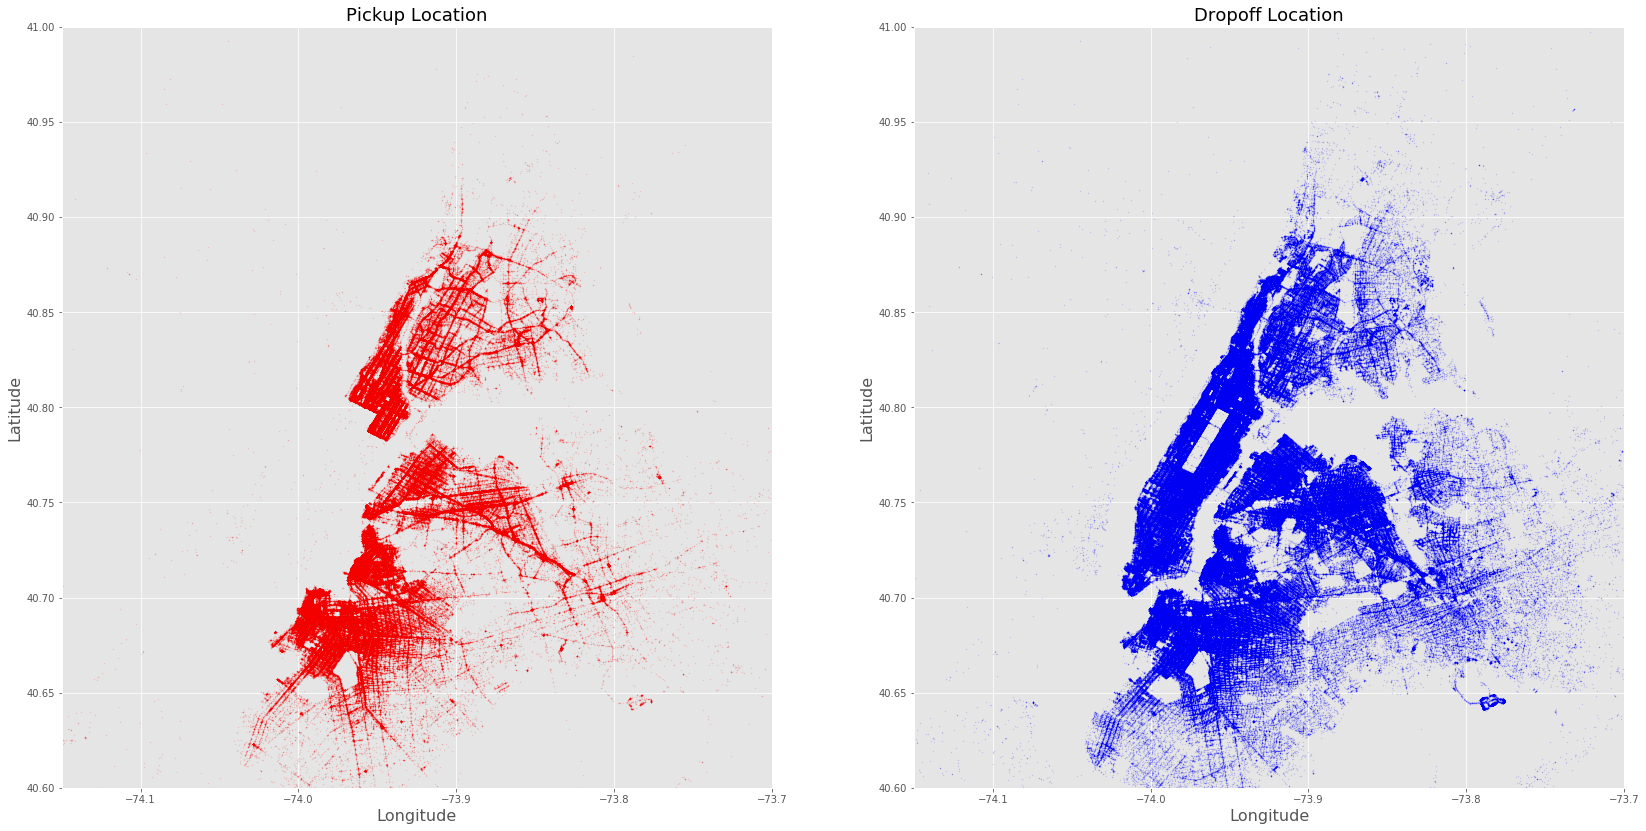

In [163]:
fig = plt.figure(figsize=(28,14))
ax1 = fig.add_subplot(121)
ax1.scatter(df.Pickup_longitude,
            df.Pickup_latitude,
            s=1,alpha=0.1,color='red')

plt.ylim([40.60,41.00])
plt.xlim([-74.15,-73.70])
plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude',fontsize=16)
plt.title('Pickup Location',fontsize=18)

ax1 = fig.add_subplot(122)
ax1.scatter(df.Dropoff_longitude,
            df.Dropoff_latitude,
            s=1,alpha=0.1,color='blue')

plt.ylim([40.60,41.00])
plt.xlim([-74.15,-73.70])
plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude',fontsize=16)
plt.title('Dropoff Location',fontsize=18)

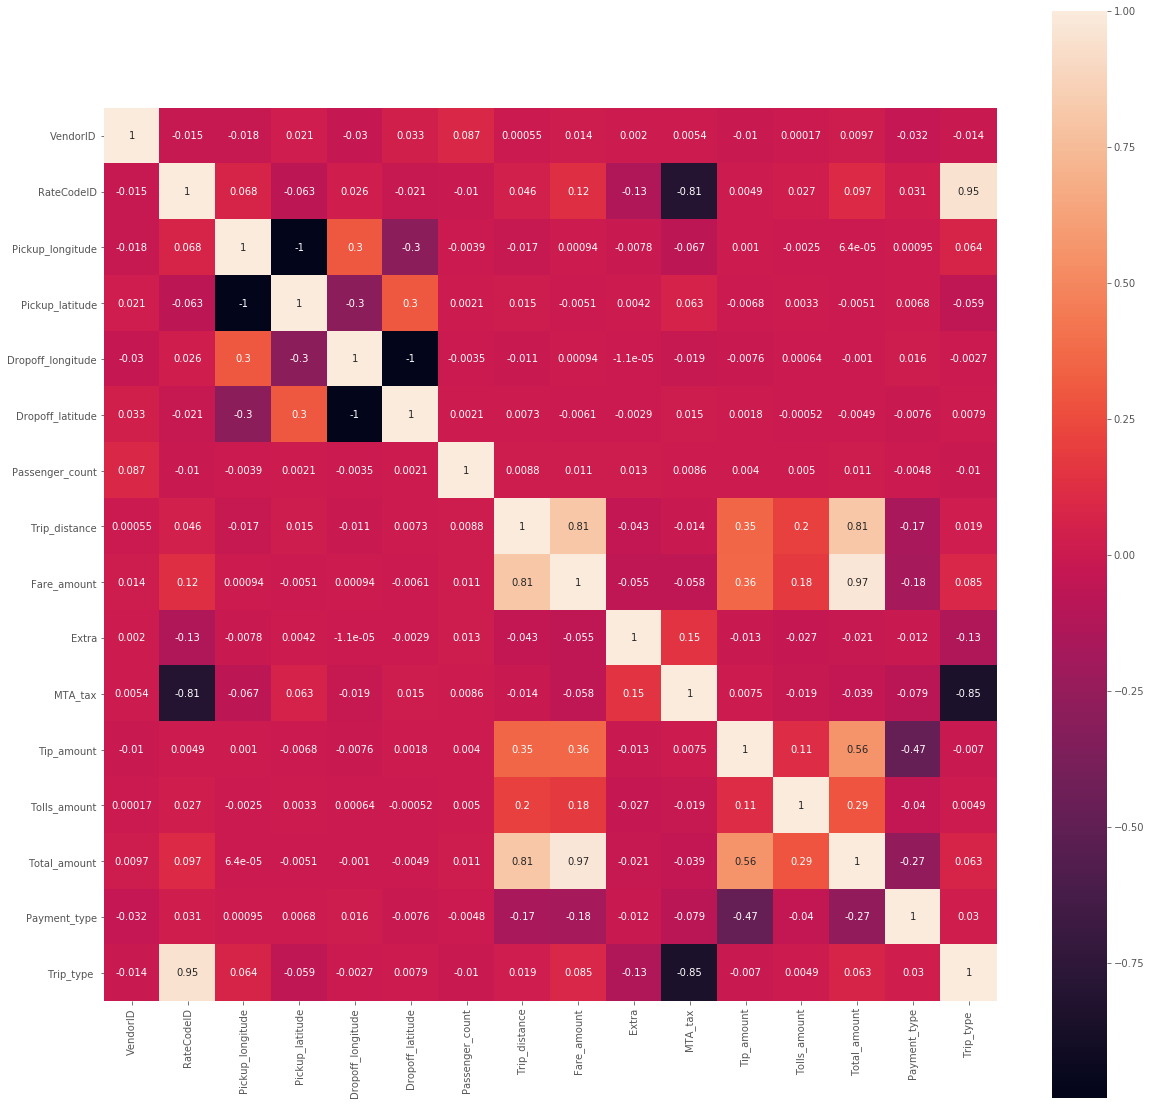

In [164]:
numtrain = df.select_dtypes(include=[np.number])
corr = numtrain.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,vmax=1,square=True,annot=True)

Observed correlations:
- strong correlations between tolls and location features;
- ratecode is correlations with latitude and longtitude;

Interpreting the value of r
— The value of r (or rho) ranges smoothly from [-1.0 to 1.0].
— When the variables are negatively correlated r=[-1, 0).
— r=-1 implies a perfect negative correlation.
— When they are positively correlated r=(0, +1].
— r=+1 implies a perfect positive correlation.
— When r = [0], the variables are not linearly correlated.

# Data Processing data